# RQ1. How interpretabilities are consistent?

1. Variability across Seeds
2. Comparison of Saliency map across: XAI Methods, Architectures, Tasks (Age reg vs. cls)
3. Compare with Traditional Methods: Fastsurfer Segmentation, VBM

In [1]:
import matplotlib.pyplot as plt

import weight_parser as wp
import stats as s
import constants as C
import plotting as p
import metadata as m
import utils as u

## 1. Variability across seeds (=intra-model)

Pipeline
1. Earn Projections on DKT+ASEG ATLAS
    - This is done in inference phase
2. Calculate SpearmanR correlation between seeds 
3. Plot down triangle heatmap

In [2]:
# Loading Saliencies
# Exceptions: Convnext-base seeds are only 42, 43 and IG not provided for convnext-base
xai_pivot = dict()
xai_avgs = dict()
for xai_method in C.XAI_METHODS:
    xai_avg = [wp.WeightAvg(model_name=model_name,
                            xai_method=xai_method,
                            seeds=[42, 43, 44])
                            # seeds=[42, 43, 44] if model_name != "convnext-base" else [42, 43])
               for model_name in (C.MODELS if xai_method != "ig" else C.MODELS[:-1])]
    xai_avgs[xai_method] = xai_avg
    xai_corr, xai_pval = s.spearmanr_combination(weight_avgs=xai_avg)
    xai_pivot[xai_method] = xai_corr

INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Load all seeds: [42, 43, 44]
/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/daehyun/codespace/brain-age-prediction/RQ/stats.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = ss.spearmanr(lst1, lst2)
/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:232: RuntimeWarning: invalid value encountered in add
  arr += getattr(self.seed_dict[seed], arr_name)
/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/numpy/core/_methods.py:152: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, 

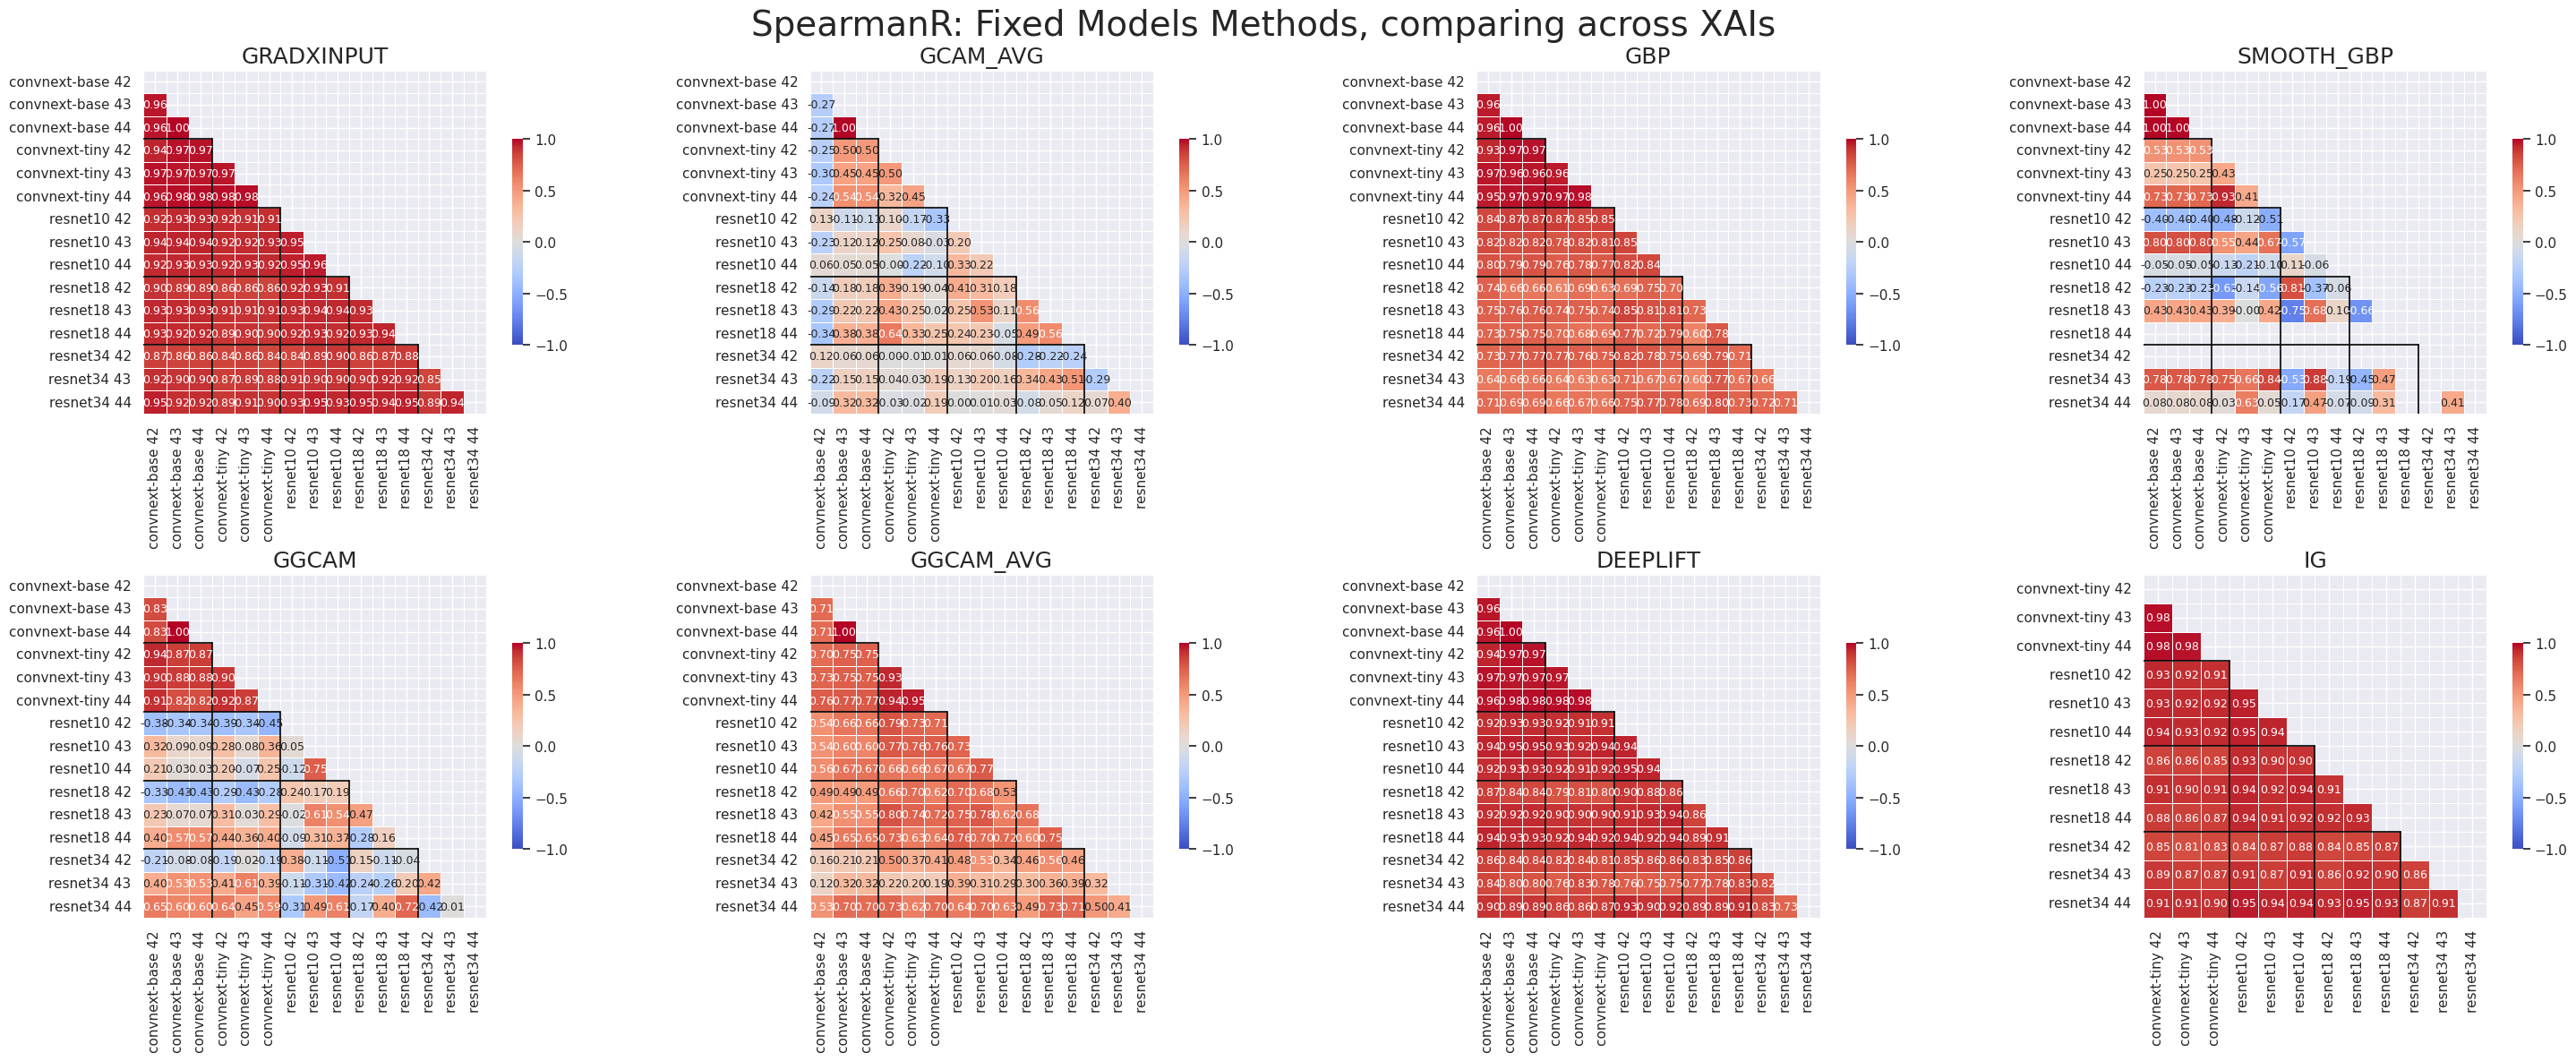

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30, 12))
for i, xai_method in enumerate(xai_pivot):
    r, c = i // 4, i % 4
    p.plot_corr(corr=xai_pivot[xai_method], subtitle=xai_method.upper(), subtitle_size=18, cbar_size=0.6, ax=ax[r, c])
fig.suptitle("SpearmanR: Fixed Models Methods, comparing across XAIs", size=28);
fig.tight_layout()

## 2. Variability Across Models (fixed Model, different XAI Method)

In [4]:
# Load Saliencies
model_pivot = dict()
model_avgs = dict()
for i, model in enumerate(C.MODELS):
    seeds = [42, 43] if model == "convnext-base" else [42, 43, 44]
    _xai_methods = C.XAI_METHODS[:-1] if model == "convnext-base" else C.XAI_METHODS
    avgs = [wp.WeightAvg(model_name=model, xai_method=xai_method, seeds=seeds) for xai_method in _xai_methods]
    model_avgs[model] = avgs
    
    corr, pval = s.spearmanr_combination(avgs, naming="xai")
    model_pivot[model] = corr

/home/daehyun/codespace/brain-age-prediction/RQ/stats.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = ss.spearmanr(lst1, lst2)
/home/daehyun/codespace/brain-age-prediction/RQ/stats.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = ss.spearmanr(lst1, lst2)
/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:232: RuntimeWarning: invalid value encountered in add
  arr += getattr(self.seed_dict[seed], arr_name)
/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/numpy/cor

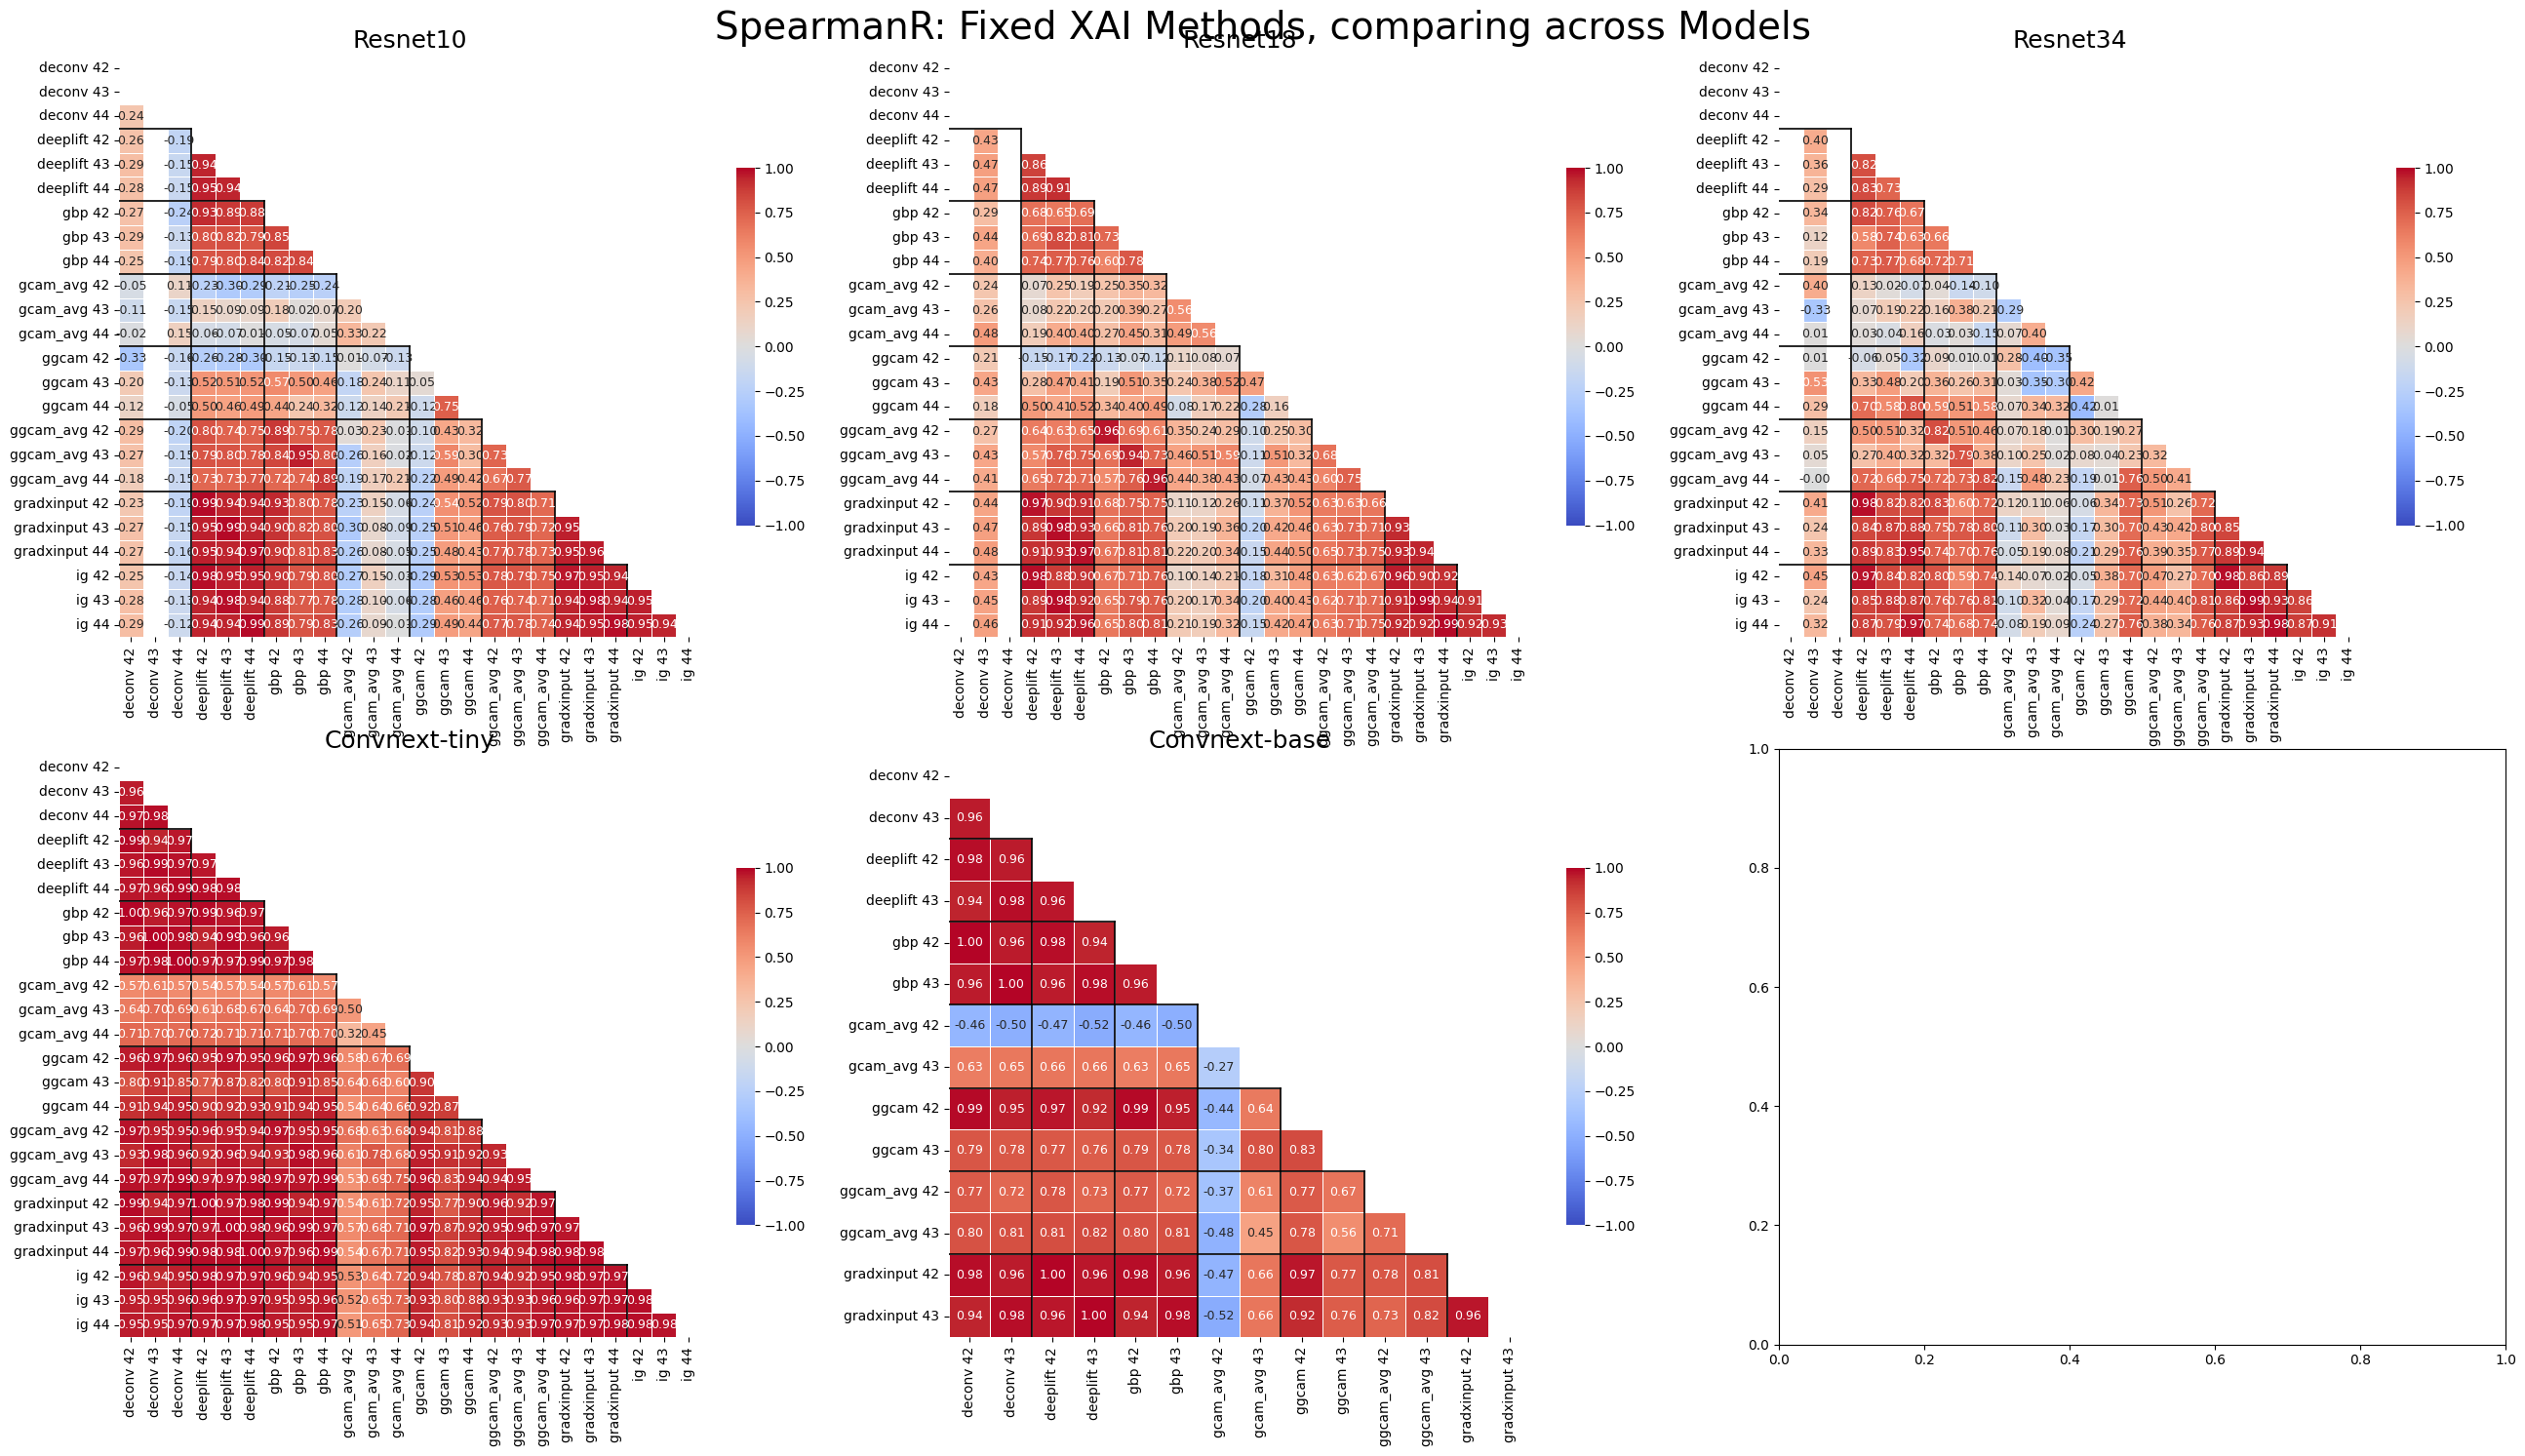

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26, 15))
for i, model in enumerate(model_pivot):
    r, c = i // 3, i % 3
    p.plot_corr(corr=model_pivot[model], subtitle=model.capitalize(), subtitle_size=18, cbar_size=0.6, ax=ax[r, c])
fig.suptitle("SpearmanR: Fixed XAI Methods, comparing across Models", size=28)
fig.tight_layout()

## 3. Comparisons against Conventional Methods (Fastsurfer Segmentation, VBM analysis)

In [17]:
meta_dicts = m.load_metadata()
meta_dicts.keys()

dict_keys(['VBM Young-to-old', 'VBM Old-to-Young', 'Fastsurfer Voxel', 'Fastsurfer Intensity'])

In [18]:
%cd ..
from sage.xai.atlas import get_atlas
from sage.xai.atlas_overlap import project_to_atlas
%cd RQ

dkt = get_atlas(atlas_name="dkt")
plot_kwargs = dict(atlas=dkt, use_abs=False)

/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
INFO:/home/daehyun/codespace/brain-age-prediction/sage/xai/atlas.py:Load dkt atlas.


/home/daehyun/codespace/brain-age-prediction
/home/daehyun/codespace/brain-age-prediction/RQ


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

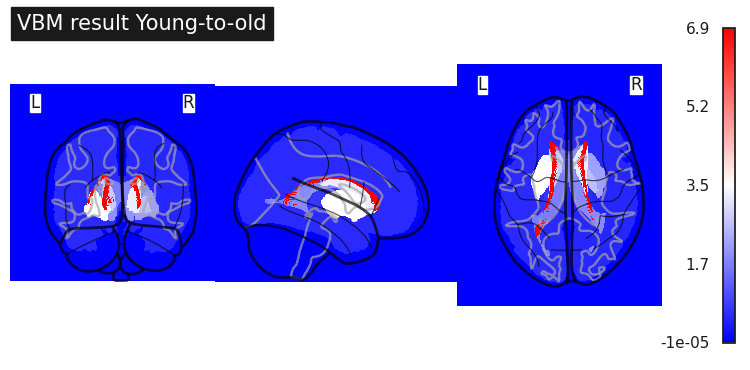

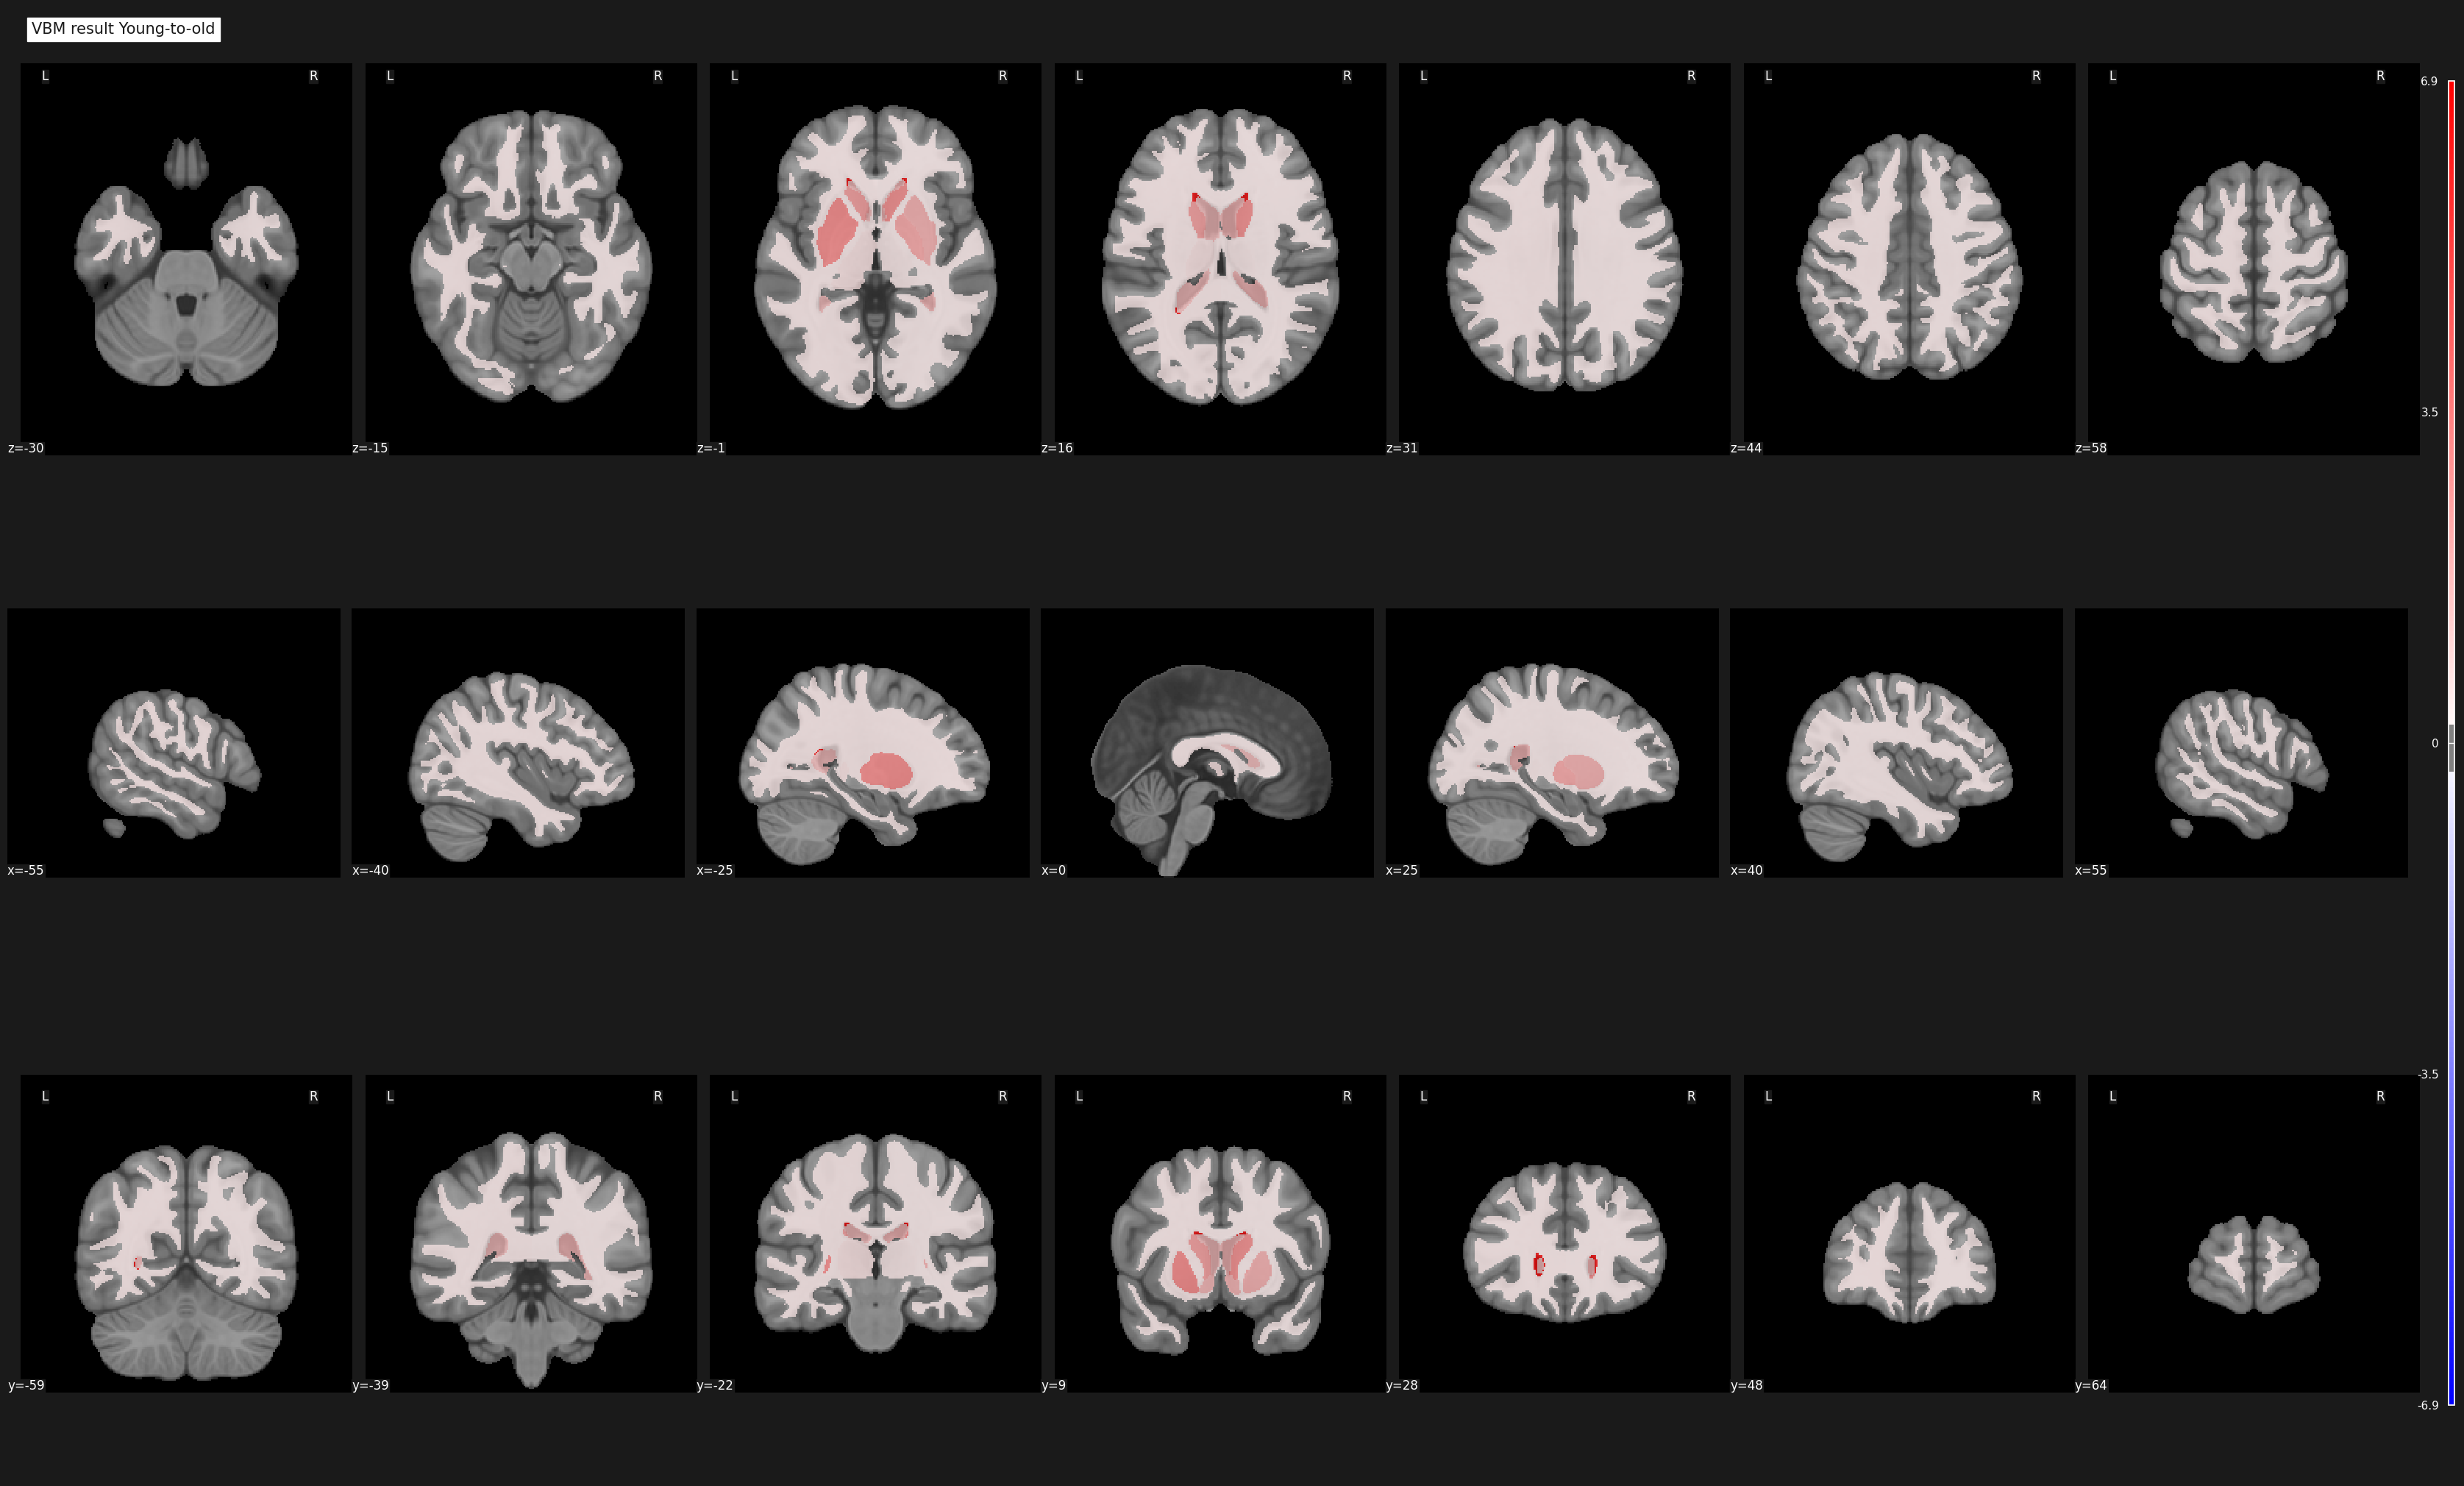

In [19]:
project_to_atlas(xai_dict=meta_dicts["VBM Young-to-old"], title=f"VBM result Young-to-old", **plot_kwargs)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

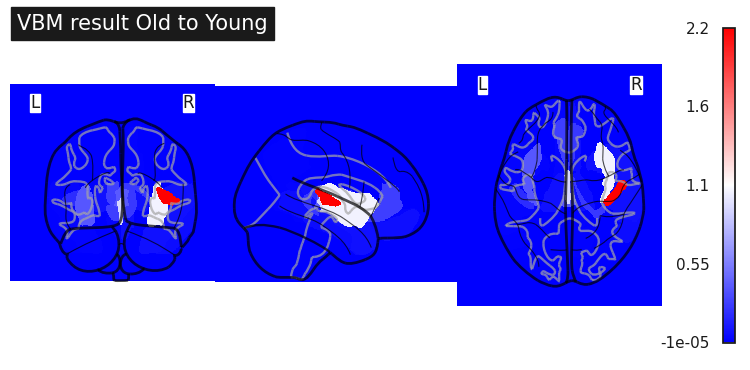

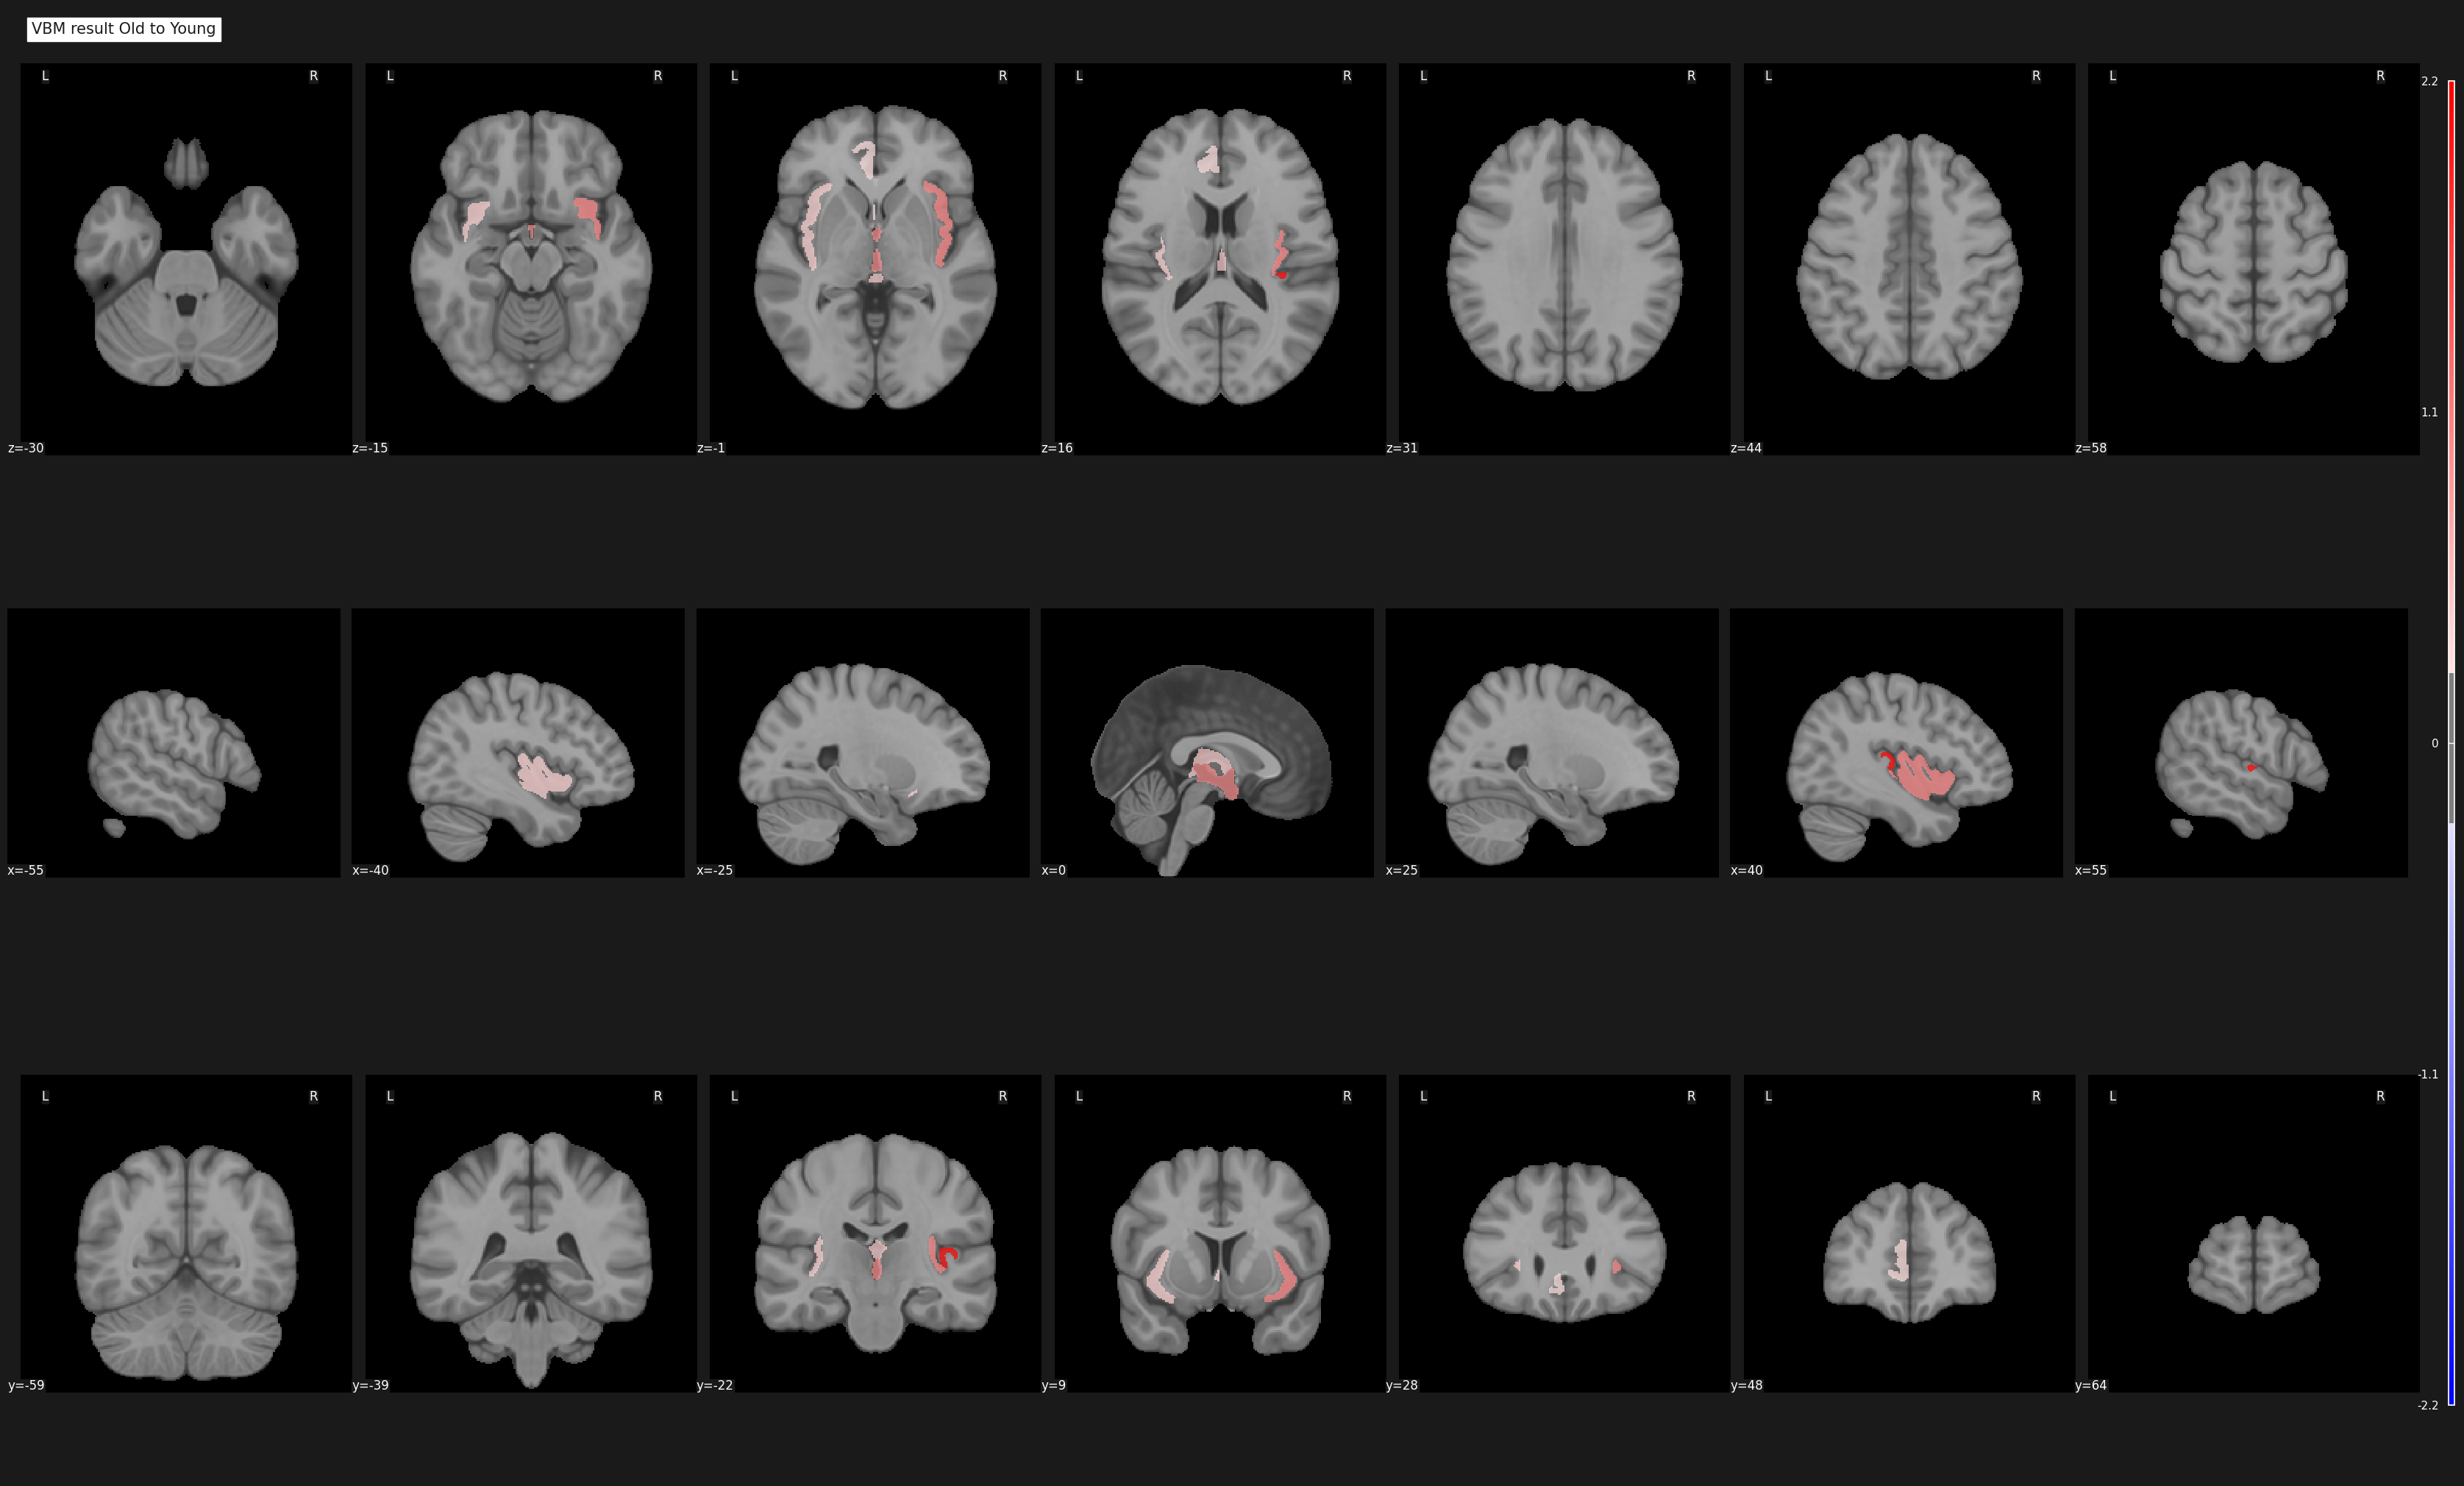

In [20]:
project_to_atlas(xai_dict=meta_dicts["VBM Old-to-Young"], title=f"VBM result Old to Young", **plot_kwargs);

In [23]:
fs = meta_dicts["Fastsurfer Voxel"]
fs

{'Left-Cerebral-White-Matter': [-0.19130415596508304, 2.3398402463830363e-26],
 'Left-Lateral-Ventricle': [0.4226323996752357, 1.5804985655134788e-131],
 'Left-Inf-Lat-Vent': [0.45213046330341633, 1.5451815011129717e-152],
 'Left-Cerebellum-White-Matter': [-0.344319329425834, 4.7396177621994836e-85],
 'Left-Cerebellum-Cortex': [-0.23311818310144417, 1.1573710130044817e-38],
 'Left-Thalamus': [-0.5153380538930596, 3.646627353515341e-205],
 'Left-Caudate': [0.002548308541157394, 0.888508337057367],
 'Left-Putamen': [0.06686067935080782, 0.00023107582117614463],
 'Left-Pallidum': [-0.01624647627301764, 0.37140926766192284],
 '3rd-Ventricle': [0.46147773638771244, 1.2202895275593228e-159],
 '4th-Ventricle': [0.1348012340149249, 9.338846739433498e-14],
 'Brain-Stem': [-0.12231352589979505, 1.4354081790650104e-11],
 'Left-Hippocampus': [-0.355289335187282, 8.203508265837499e-91],
 'Left-Amygdala': [-0.25262463843975286, 2.5691510967613284e-45],
 'CSF': [0.30159764128506694, 9.887520441290017

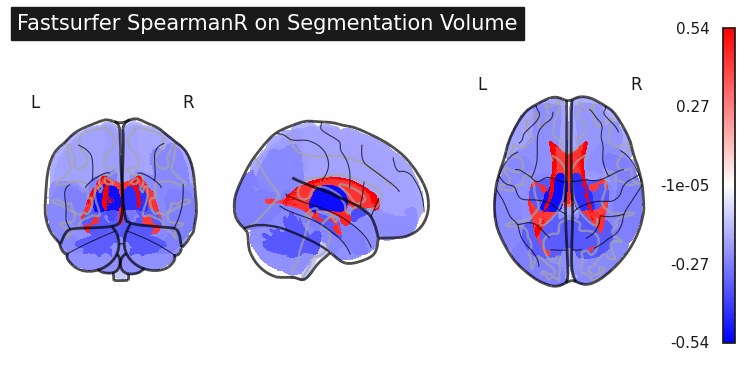

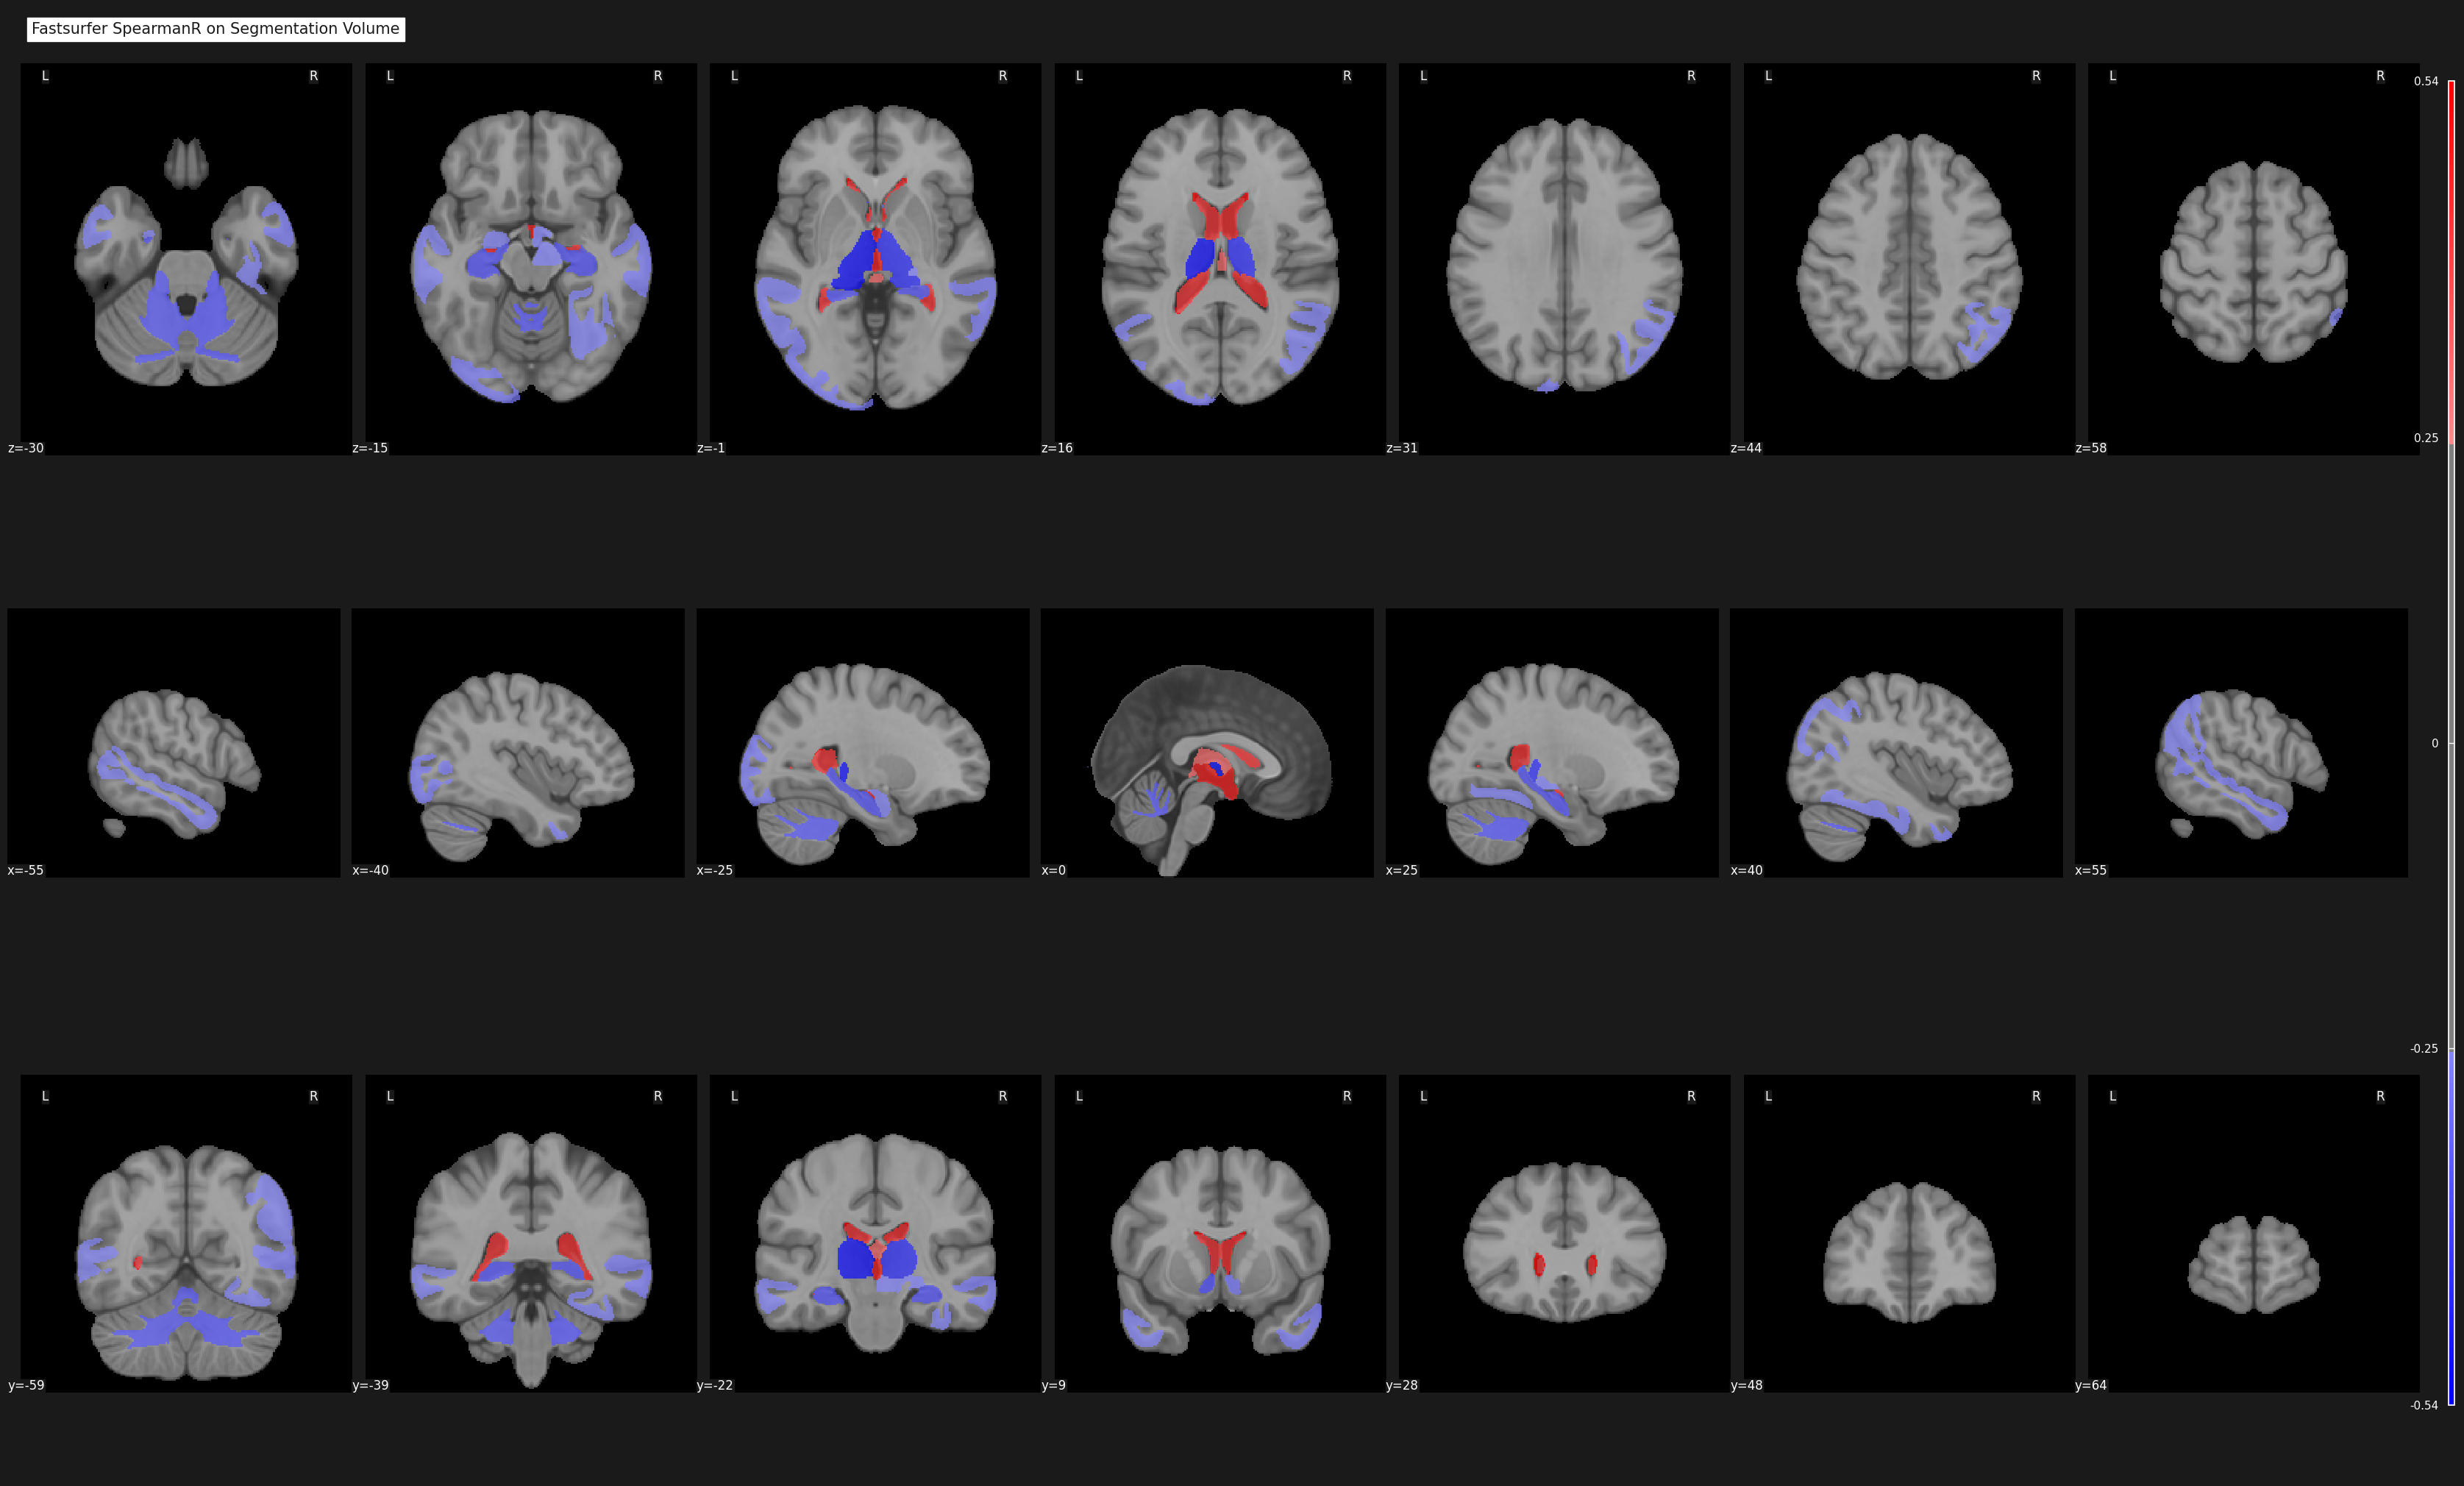

In [28]:
project_to_atlas(xai_dict={k: v[0] for k, v in meta_dicts["Fastsurfer Voxel"].items()},
                 title=f"Fastsurfer SpearmanR on Segmentation Volume", **plot_kwargs);

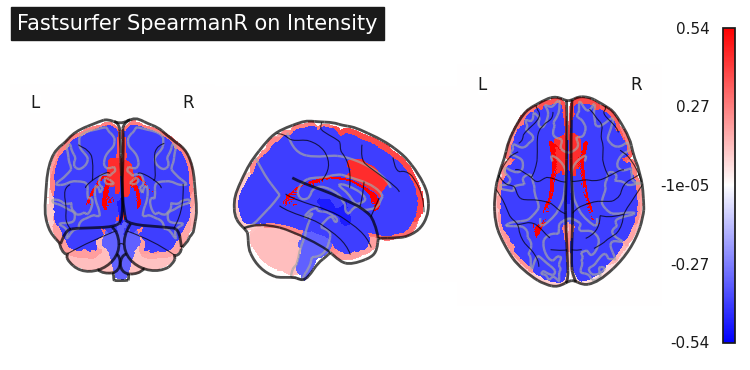

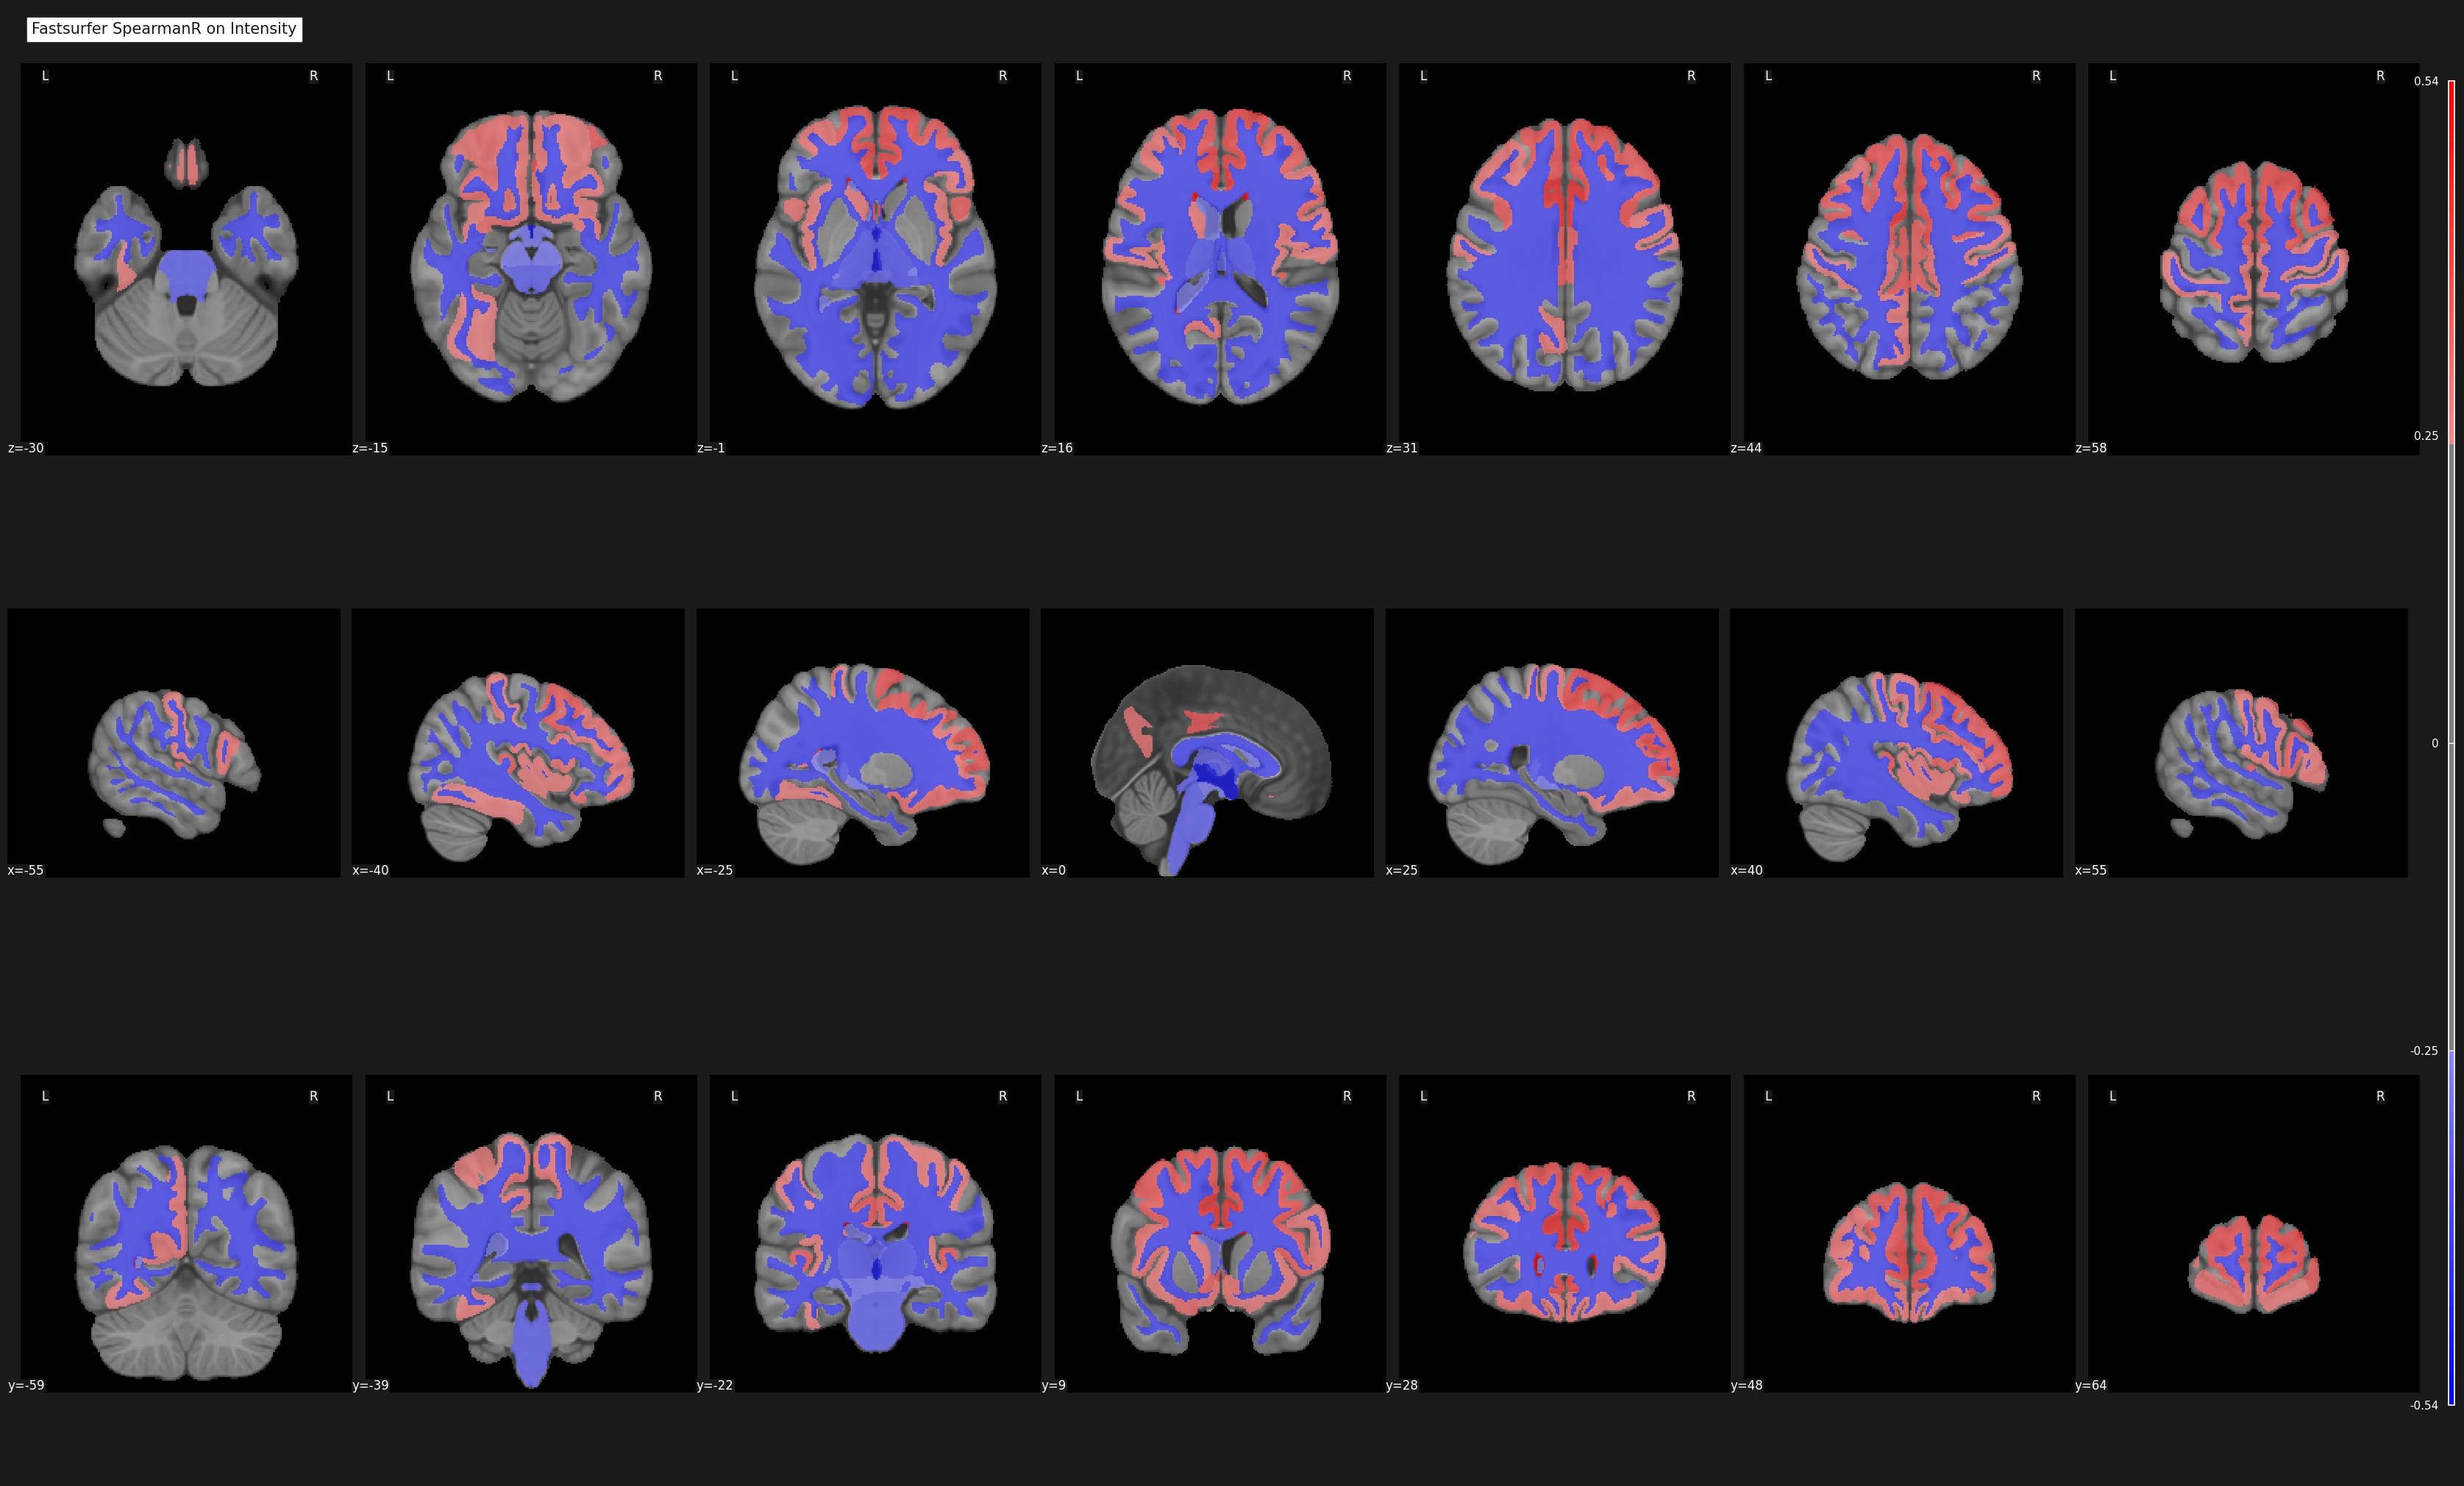

In [25]:
project_to_atlas(xai_dict={k: v[0] for k, v in meta_dicts["Fastsurfer Intensity"].items()},
                 title=f"Fastsurfer SpearmanR on Intensity", **plot_kwargs);

/home/daehyun/codespace/brain-age-prediction/RQ/stats.py:49: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = ss.spearmanr(meta_stats, dl_stats)


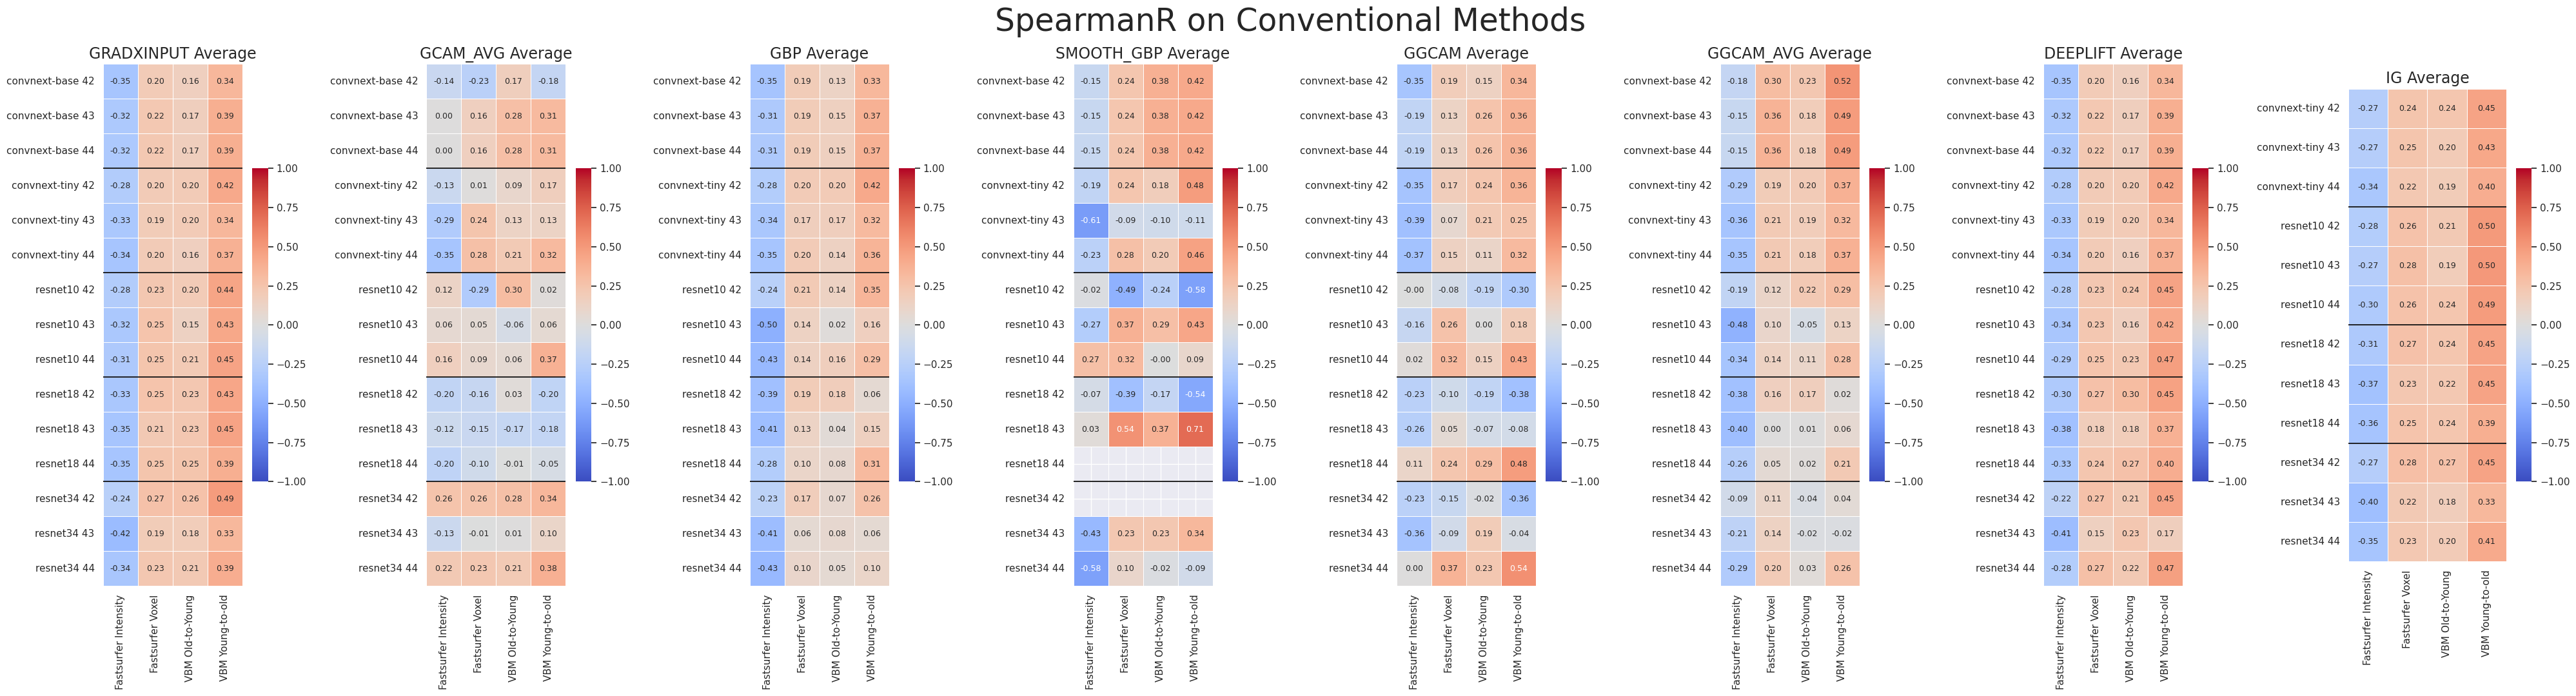

In [6]:
fig, ax = plt.subplots(ncols=8, figsize=(40, 11))
for i, xai_method in enumerate(xai_avgs):
    corrs, pvals = s.spearmanr_vs(weight_avgs=xai_avgs[xai_method], meta_dicts=meta_dicts)
    p.plot_corr(corrs, hide_triu=False, ax=ax[i], cbar_size=0.6,
                use_cbar=True, subtitle=f"{xai_method.upper()} Average",
                subtitle_size=17)
fig.suptitle("SpearmanR on Conventional Methods", size=35)
fig.tight_layout()

/home/daehyun/codespace/brain-age-prediction/RQ/stats.py:49: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = ss.spearmanr(meta_stats, dl_stats)
/home/daehyun/codespace/brain-age-prediction/RQ/stats.py:49: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = ss.spearmanr(meta_stats, dl_stats)


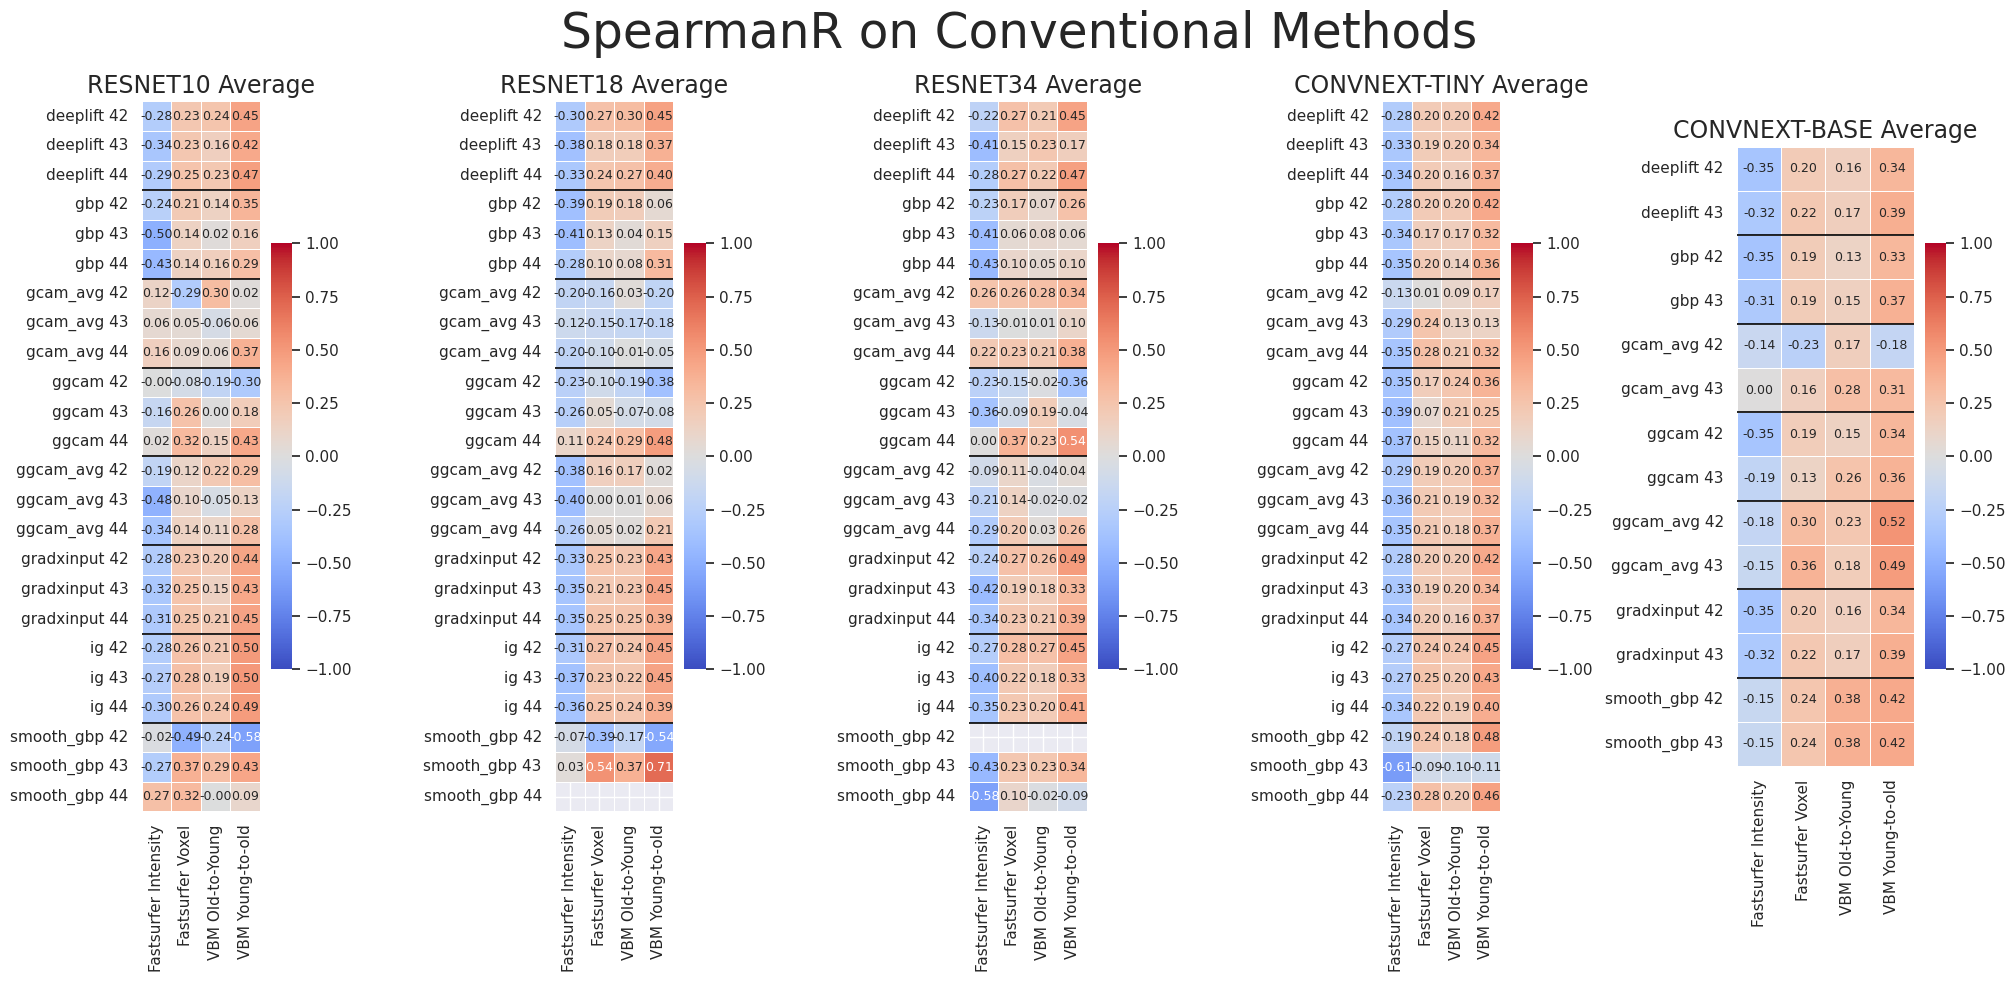

In [7]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 10))
for i, model in enumerate(model_avgs):
    corrs, pvals = s.spearmanr_vs(weight_avgs=model_avgs[model], meta_dicts=meta_dicts, naming="model")
    p.plot_corr(corrs, hide_triu=False, ax=ax[i], cbar_size=0.6,
                use_cbar=True, subtitle=f"{model.upper()} Average",
                subtitle_size=17)
fig.suptitle("SpearmanR on Conventional Methods", size=35)
fig.tight_layout()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import calc
import constants as C
import metadata as m


INTERPS = m.load_interps()

/tmp/ipykernel_27441/427792060.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:176: RuntimeWarning: invalid value encountered in divide
  arr = arr / (norm + eps)
/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:176: RuntimeWarning: invalid value encountered in divide
  arr = arr / (norm + eps)
/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:176: RuntimeWarning: invalid value encountered in divide
  arr = arr / (norm + eps)


In [2]:
intra_cossim = calc.intra_robustness(interps=INTERPS, method="cossim")
intra_spear = calc.intra_robustness(interps=INTERPS, method="spearmanr")

inter_cossim = calc.inter_robustness(interps=INTERPS, method="cossim")
inter_spear = calc.inter_robustness(interps=INTERPS, method="spearmanr")

gradxinput
gcam_avg
gbp
smooth_gbp
ggcam
ggcam_avg
deeplift
ig
gradxinput


/home/daehyun/codespace/brain-age-prediction/RQ/calc.py:29: RuntimeWarning: invalid value encountered in divide
  v = v / norm


gcam_avg
gbp
smooth_gbp


/home/daehyun/codespace/brain-age-prediction/RQ/calc.py:144: RuntimeWarning: Mean of empty slice
  return np.nanmean(simvec) if return_avg else simvec


ggcam
ggcam_avg
deeplift
ig
gradxinput
gcam_avg
gbp
smooth_gbp
ggcam
ggcam_avg
deeplift
ig
gradxinput


/home/daehyun/codespace/brain-age-prediction/RQ/calc.py:29: RuntimeWarning: invalid value encountered in divide
  v = v / norm


gcam_avg
gbp
smooth_gbp


/home/daehyun/codespace/brain-age-prediction/RQ/calc.py:144: RuntimeWarning: Mean of empty slice
  return np.nanmean(simvec) if return_avg else simvec


ggcam
ggcam_avg
deeplift
ig


In [5]:
intra_df = pd.concat([intra_cossim, intra_spear])
intra_df[C.HUECOL] = "Intra: " + intra_df[C.HUECOL]
inter_df = pd.concat([inter_cossim, inter_spear])
inter_df[C.HUECOL] = "Inter: " + inter_df[C.HUECOL]

df = pd.concat([intra_df, inter_df]).reset_index(drop=True)

Text(0, 0.5, 'Similarity')

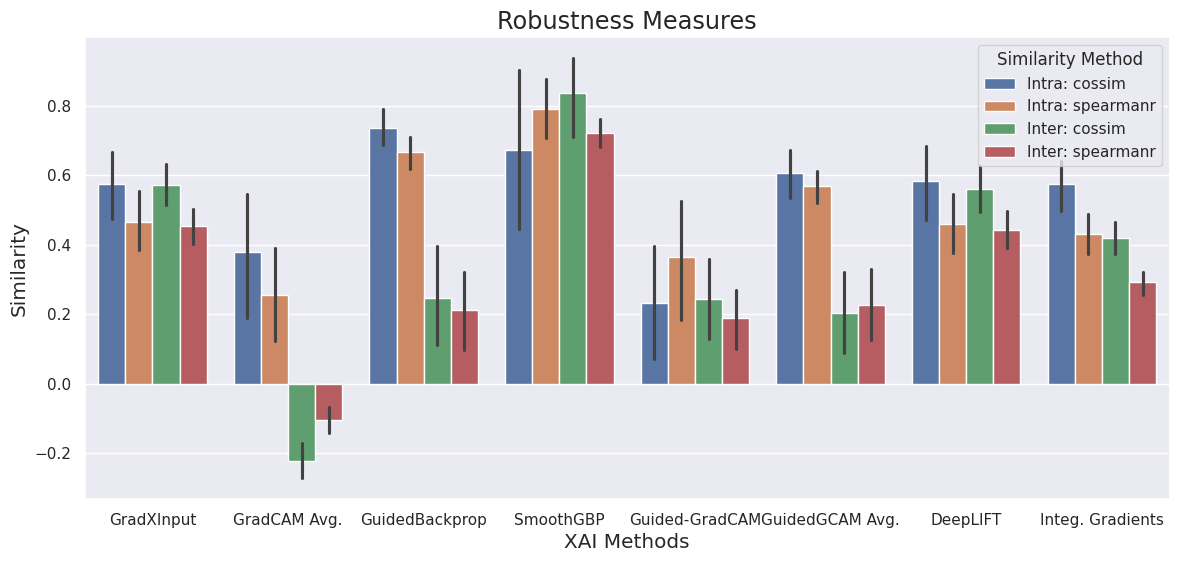

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.barplot(data=df, x=C.XCOL, y=C.YCOL, hue=C.HUECOL, ax=ax)
ax.set_title("Robustness Measures", size="x-large")
ax.set_xlabel("XAI Methods", size="large")
ax.set_ylabel("Similarity", size="large")